In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('cars.csv', encoding='utf-8', delimiter=',')

In [37]:
# Comprobación de los tipos de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
# Eliminar columnas irrelevantes: No se va a eliminar ninguna pero se pone un ejemplo
print("No se desea eliminar ninguna columna pero se pone un ejemplo comentado")

# data = data.drop(columns="index")
# data.to_csv('archivo_sin_columnas_irrelevantes.csv', index=False)

In [ ]:
# Eliminar las filas duplicadas.
df_sin_duplicados = data.drop_duplicates()

# Guardar el DataFrame sin duplicados en un nuevo archivo CSV
df_sin_duplicados.to_csv('archivo_sin_duplicados.csv', index=False)


In [ ]:
# Quitar los valores faltantes o nulos.
df_sin_nulos = df_sin_duplicados.dropna()

# Guardar el DataFrame sin valores nulos en un nuevo archivo CSV
df_sin_nulos.to_csv('archivo_sin_nulos.csv', index=False)

In [40]:
# Cambiar el nombre de las columnas.

datos_sin_nulos = pd.read_csv('archivo_sin_nulos.csv', encoding='utf-8', delimiter=',')
datos_sin_nulos.rename(columns={'Engine HP': 'Horsepower-CV'}, inplace=True)
datos_sin_nulos.rename(columns={'Driven_Wheels': 'Tracción'}, inplace=True)
datos_sin_nulos.rename(columns={'MSRP': 'Precio'}, inplace=True)

# Guardar el DataFrame con el nombre de columna modificado en un nuevo archivo CSV
datos_sin_nulos.to_csv('archivo_con_columna_modificada.csv', index=False)


In [41]:
# Cambiar el tipo de dato a algunas columnas (Cuando previamente se hayan quitado valores NaN, porque sino dará error)
datos_sin_nulos['Horsepower-CV'] = datos_sin_nulos['Horsepower-CV'].astype(int)
datos_sin_nulos['Engine Cylinders'] = datos_sin_nulos['Engine Cylinders'].astype(int)
datos_sin_nulos['Number of Doors'] = datos_sin_nulos['Number of Doors'].astype(int)
datos_sin_nulos['Precio'] = datos_sin_nulos['Precio'].astype('float64')
datos_sin_nulos.to_csv('archivo_con_tipo_de_dato_modificado.csv', index=False)
datos_sin_nulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7735 entries, 0 to 7734
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               7735 non-null   object 
 1   Model              7735 non-null   object 
 2   Year               7735 non-null   int64  
 3   Engine Fuel Type   7735 non-null   object 
 4   Horsepower-CV      7735 non-null   int32  
 5   Engine Cylinders   7735 non-null   int32  
 6   Transmission Type  7735 non-null   object 
 7   Tracción           7735 non-null   object 
 8   Number of Doors    7735 non-null   int32  
 9   Market Category    7735 non-null   object 
 10  Vehicle Size       7735 non-null   object 
 11  Vehicle Style      7735 non-null   object 
 12  highway MPG        7735 non-null   int64  
 13  city mpg           7735 non-null   int64  
 14  Popularity         7735 non-null   int64  
 15  Precio             7735 non-null   float64
dtypes: float64(1), int32(3),

In [42]:
# Detección de valores atípicos (Outliers)
datos_atipicos = pd.read_csv('archivo_con_tipo_de_dato_modificado.csv', encoding='utf-8', delimiter=',')
datos_atipicos.info()
datos_atipicos.describe()
# Engine Cylinders = No puede haber cilindrada de 0
# Highway MPG = Audi A6 =354, comparado con otro debería ser aprox. 38
# Precio = se podría eliminar fila index 7326 del bugatti más caro, coincide con otro a menor precio, mismas características


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7735 entries, 0 to 7734
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               7735 non-null   object 
 1   Model              7735 non-null   object 
 2   Year               7735 non-null   int64  
 3   Engine Fuel Type   7735 non-null   object 
 4   Horsepower-CV      7735 non-null   int64  
 5   Engine Cylinders   7735 non-null   int64  
 6   Transmission Type  7735 non-null   object 
 7   Tracción           7735 non-null   object 
 8   Number of Doors    7735 non-null   int64  
 9   Market Category    7735 non-null   object 
 10  Vehicle Size       7735 non-null   object 
 11  Vehicle Style      7735 non-null   object 
 12  highway MPG        7735 non-null   int64  
 13  city mpg           7735 non-null   int64  
 14  Popularity         7735 non-null   int64  
 15  Precio             7735 non-null   float64
dtypes: float64(1), int64(7),

,Year,Horsepower-CV,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Precio
count,7735.00000,7735.000000,7735.000000,7735.000000,7735.00000,7735.000000,7735.000000,7.735000e+03
mean,2012.14958,277.632062,5.825469,3.421332,26.52980,19.468649,1513.098772,5.102826e+04
std,6.23167,115.529955,1.895593,0.895054,7.78492,7.231534,1429.197317,7.153777e+04
min,1990.00000,55.000000,0.000000,2.000000,12.00000,7.000000,2.000000,2.000000e+03
25%,2010.00000,194.000000,4.000000,2.000000,22.00000,16.000000,520.000000,2.622500e+04
50%,2015.00000,270.000000,6.000000,4.000000,26.00000,18.000000,1013.000000,3.560000e+04
75%,2016.00000,325.000000,6.000000,4.000000,30.00000,22.000000,2009.000000,4.947750e+04
max,2017.00000,1001.000000,16.000000,4.000000,354.00000,137.000000,5657.000000,2.065902e+06


In [44]:
# Eliminar registros con Engine Cylinders = 0

datos_atipicos = datos_atipicos[datos_atipicos['Engine Cylinders'] != 0]
datos_atipicos.to_csv('archivo_sin_registros_0.csv', index=False)

In [45]:
# Eliminar la fila con índice 2
datos_atipicos = datos_atipicos.drop(index=7326)

In [46]:
# Modificar => Highway MPG = Audi A6 =354, comparado con otro debería ser aprox. 38
datos_atipicos.at[944, 'highway MPG'] = 38
datos_atipicos.to_csv('archivo_sin_Outliers.csv', index=False)


In [4]:
# Visualización de los datos
datos = pd.read_csv('archivo_sin_Outliers.csv', encoding='utf-8', delimiter=',')
datos.info()
datos.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7721 entries, 0 to 7720
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               7721 non-null   object 
 1   Model              7721 non-null   object 
 2   Year               7721 non-null   int64  
 3   Engine Fuel Type   7721 non-null   object 
 4   Horsepower-CV      7721 non-null   int64  
 5   Engine Cylinders   7721 non-null   int64  
 6   Transmission Type  7721 non-null   object 
 7   Tracción           7721 non-null   object 
 8   Number of Doors    7721 non-null   int64  
 9   Market Category    7721 non-null   object 
 10  Vehicle Size       7721 non-null   object 
 11  Vehicle Style      7721 non-null   object 
 12  highway MPG        7721 non-null   int64  
 13  city mpg           7721 non-null   int64  
 14  Popularity         7721 non-null   int64  
 15  Precio             7721 non-null   float64
dtypes: float64(1), int64(7),

,Year,Horsepower-CV,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Precio
count,7721.000000,7721.000000,7721.000000,7721.000000,7721.000000,7721.000000,7721.000000,7.721000e+03
mean,2012.144282,277.740189,5.833959,3.420541,26.361741,19.300479,1512.391400,5.079511e+04
std,6.235379,115.234212,1.878607,0.895404,6.059706,5.882098,1429.311014,6.782654e+04
min,1990.000000,55.000000,3.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2010.000000,194.000000,4.000000,2.000000,22.000000,16.000000,520.000000,2.622500e+04
50%,2015.000000,270.000000,6.000000,4.000000,26.000000,18.000000,1013.000000,3.559500e+04
75%,2016.000000,325.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.949500e+04
max,2017.000000,1001.000000,16.000000,4.000000,53.000000,58.000000,5657.000000,1.705769e+06


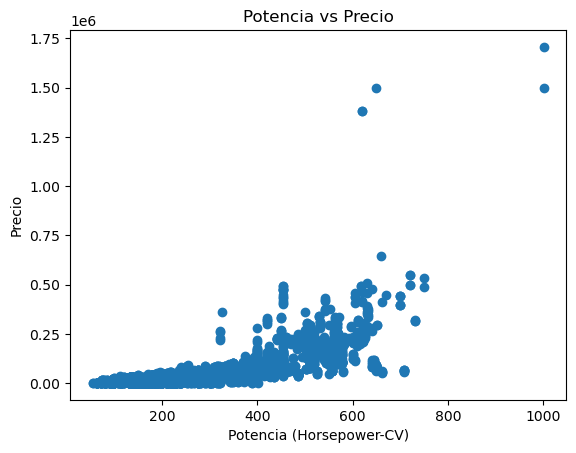

In [6]:
# Trazar diferentes características entre sí (dispersión), contra frecuencia (histograma).

# Gráfico de dispersión: Potencia (Horsepower-CV) vs Precio

plt.scatter(datos['Horsepower-CV'], datos['Precio'])
plt.xlabel('Potencia (Horsepower-CV)')
plt.ylabel('Precio')
plt.title('Potencia vs Precio')
plt.savefig('scatter_plot.png')
plt.show()

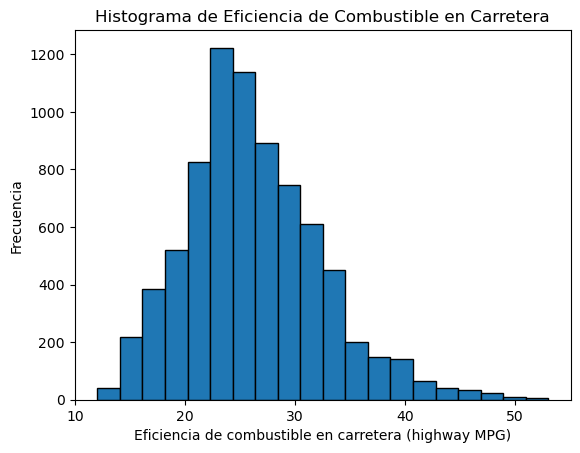

In [7]:
plt.hist(datos['highway MPG'], bins=20, edgecolor='black')
plt.xlabel('Eficiencia de combustible en carretera (highway MPG)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Eficiencia de Combustible en Carretera')
plt.savefig('histogram.png') 
plt.show()